# SVM

is a supervised machine learning used to classification and regression. used in pattern recognition, image analysis and NlP.

> SVM : Finding Optimale Hyperlane that Separate Data Points into Different Classes, for Classified New Input.

# Hyperplane

is a decision boundary that separates data points into two different classes in a multidimentional space. line for two dimentional space and plane for three dimentional space. Let say for n space dimentional space, hyperlane has n-1 dimention.

## SVM in 2D Data
![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*oRk-5aab0G8SkBX2fpw8Gw.png)

# Margin

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*O1gYUEz8NTrVwIUo6H3X9w.png)

is the *distance* between *hyperplane* and *support vectors* or closest data point from each class.


The goal of SVM : Finding hyperplane that *Maximize Margine Value*. or Finding the Hyperplane that create the larger possible distance between itself and the nearest data points from each class (Support Vector).

Larger margin indicates bigger confidance in the classification. means that there is a larger gap between decision boundary and closest data points from each class.

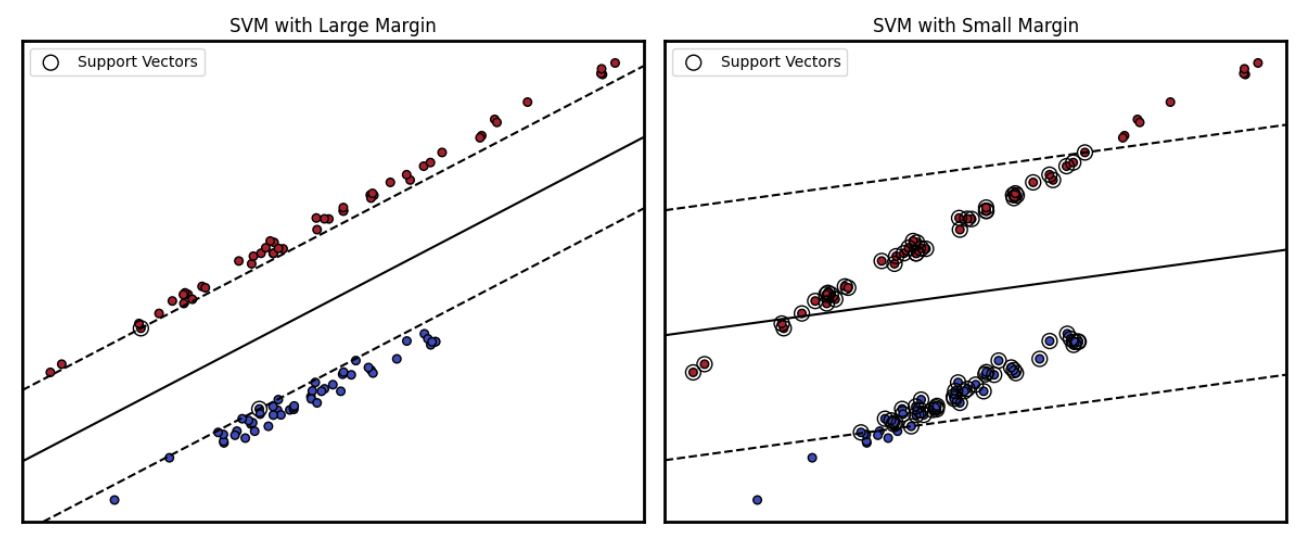

Imagine on how you separated two different feature (blue and red) into two classes, there will be line in the middle to separated them. margin is a distance from this line to closest point of data from classes. 

Remember Margin value is based on the boundary decisions (hyperplane), for that example, hyperplane 1 have maximize margin, but 2 isnt, when the support vectors is near af this can make misleading classification, the goal is classification, when new data arrive the data is classified to classes, if the margin is too small, this can lead new data is not in the correct classes.





# Support Vectors 

is a data points that is closest to the hyperpplane. this used to calculate margin. the distance between Support Vectors and Hyperplane or boundary decisions, the goal is maximize the margin. so support vectors is important.

## Deep Understanding with Example Datasets

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create DataFrame with feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target

# Select only the first 150 rows (Iris dataset already has 150 rows)
df= df.iloc[:150]  # This is actually all rows, but ensures consistency

# Rename columns for better readability
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Target"]

df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Iris dataset have four different feature or columns or independent variables. okey lets just use 2 feature two classified into two classes.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*g8jswXxtfBJvCdkbayW1ig.png)

Lighter points in left down side beside the line is classes Iris Sentosa, and darker in the other side of line is iris versicolo classes. this line is just linear classifier, didnt really good at classification.

Lets use SVM

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Sp-LIz52_-RNVVQlTmoEDQ.png)

The data distribution is still the same, how ever, the line or decision boundary that separated the class is more accurate, which has a maximum margin or maximum distance between decision boundary line or hyperplane and support vectors which is the nearest points of each classes from hyperplane.

In [49]:
import importlib.util

def check_package(package_name):
    return importlib.util.find_spec(package_name) is not None

packages = ["numpy", "matplotlib", "sklearn", "IPython"]

for pkg in packages:
    print(f"{pkg}: {'Installed ✅' if check_package(pkg) else 'Not Installed ❌'}")


numpy: Installed ✅
matplotlib: Installed ✅
sklearn: Installed ✅
IPython: Installed ✅


<IPython.core.display.Javascript object>

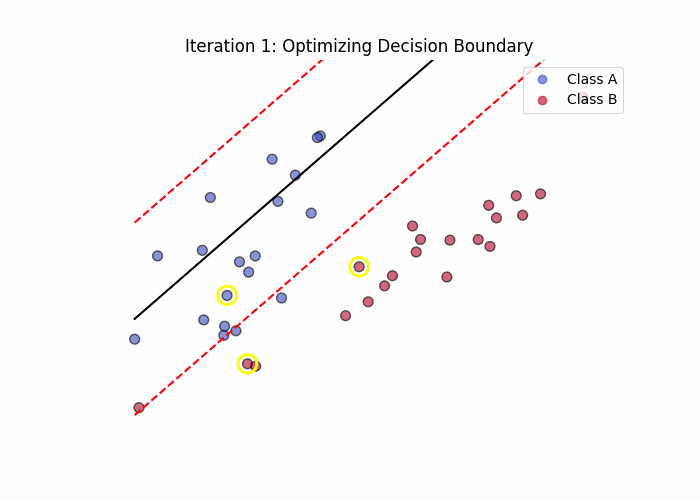

<IPython.core.display.Javascript object>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import tempfile
import IPython.display as display

# Generate dataset
X, y = make_classification(n_samples=40, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Initialize SVM
svm = SVC(kernel='linear', C=1.0)

# Set up figure
fig, ax = plt.subplots(figsize=(7, 5))

# Function to animate SVM training
def animate(epoch):
    if epoch % 5 != 0:  # Display only every 5th iteration
        return

    ax.clear()
    
    # Train on increasing dataset
    X_partial = X[:epoch + 5]
    y_partial = y[:epoch + 5]
    svm.fit(X_partial, y_partial)

    # Plot dataset with labels
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', alpha=0.6)
    handles, labels = scatter.legend_elements()
    ax.legend(handles, ["Class A", "Class B"], loc="upper right")

    # Highlight support vectors
    sv = svm.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=180, edgecolors='yellow', facecolors='none', linewidths=2, label="Support Vectors")

    # Get decision boundary
    w = svm.coef_[0]
    b = svm.intercept_[0]
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = - (w[0] * x_vals + b) / w[1]
    ax.plot(x_vals, y_vals, 'k-', label="Decision Boundary")

    # Plot margins
    margin = 1 / np.sqrt(np.sum(w ** 2))
    y_vals_margin_1 = y_vals + margin
    y_vals_margin_2 = y_vals - margin
    ax.plot(x_vals, y_vals_margin_1, 'r--', label="Margin")
    ax.plot(x_vals, y_vals_margin_2, 'r--')

    # Titles and limits
    ax.set_title(f"Iteration {epoch + 1}: Optimizing Decision Boundary")
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

# Save animation as a GIF
gif_path = tempfile.NamedTemporaryFile(suffix=".gif").name
ani = animation.FuncAnimation(fig, animate, frames=100, interval=500)
ani.save(gif_path, writer='pillow', fps=5)

# Display the GIF in Google Colab
display.display(display.Image(filename=gif_path))

# 🎯 **Final Graph (Last Iteration)**
plt.figure(figsize=(7, 5))
svm.fit(X, y)

# Plot dataset with labels
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', alpha=0.6)
handles, labels = scatter.legend_elements()
plt.legend(handles, ["Class A", "Class B"], loc="upper right")

# Highlight support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=180, edgecolors='yellow', facecolors='none', linewidths=2, label="Support Vectors")

# Get decision boundary
w = svm.coef_[0]
b = svm.intercept_[0]
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = - (w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k-', label="Decision Boundary")

# Plot margins
margin = 1 / np.sqrt(np.sum(w ** 2))
y_vals_margin_1 = y_vals + margin
y_vals_margin_2 = y_vals - margin
plt.plot(x_vals, y_vals_margin_1, 'r--', label="Margin")
plt.plot(x_vals, y_vals_margin_2, 'r--')

# Clean look (No axes)
plt.xticks([])
plt.yticks([])
plt.gca().set_frame_on(False)
plt.title("Final Decision Boundary After 50 Iterations")
plt.show()


In [50]:
HTML(ani.to_html5_video())  # Alternative if JS rendering fails


RuntimeError: Requested MovieWriter (ffmpeg) not available